In [ ]:
!pip install  opencv-python==3.4.2.17
!pip install  opencv-contrib-python==3.4.2.17
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import string
import requests
%matplotlib inline

def pobierzPlik(url, nazwaPliku):
    req = requests.get(url, stream=True)
    with open(nazwaPliku, 'wb') as uchwytPliku:
        for chunk in req.iter_content():
            uchwytPliku.write(chunk)

nazwyPlikow = ['cameraman.tif']
for nazwa in nazwyPlikow:
  pobierzPlik("https://github.com/rroszczyk/1DI2243/raw/main/data/"+nazwa, nazwa)            

In [ ]:
def rysujPunkty(P, R=np.eye(3), sec=False):
  color_lut = 'rgbc'
  fig = plt.figure()
  ax = plt.gca()
  xsP = []
  ysP = []
  xsR = []
  ysR = []  
  for row in P:
    xP, yP, iP = row
    xR, yR, iR = R@row
    xsP.append(xP)
    ysP.append(yP)
    xsR.append(xR)
    ysR.append(yR)    
    iP, iR = int(iP), int(iR) # convert float to int for indexing
    cP, cR = color_lut[iP], color_lut[iR]
    plt.scatter(xP, yP, color=cP)
    plt.text(xP + 0.15, yP, f"{string.ascii_letters[iP]}")
    if sec:
      plt.scatter(xR, yR, color=cR)      
      plt.text(xR + 0.15, yR, f"{string.ascii_letters[iR]}'")    
  xsP.append(xsP[0])
  ysP.append(ysP[0])
  xsR.append(xsR[0])
  ysR.append(ysR[0])  
  plt.plot(xsP, ysP, color="gray", linestyle='dotted')
  if sec:
    plt.plot(xsR, ysR, color="gray", linestyle='dotted')    
  ax.set_xticks(np.arange(-2.5, 3, 0.5))
  ax.set_yticks(np.arange(-2.5, 3, 0.5))
  plt.grid()
  plt.show()

In [ ]:
# punkty a, b, c oraz d
a, b, c, d = (1, 1, 0), (1, -1, 1), (-1, -1, 2), (-1, 1, 3)

# macierz zawierająca zestaw punktów
A = np.array([a, b, c, d])

# macierz identyczności 3x3
I = np.eye(3)

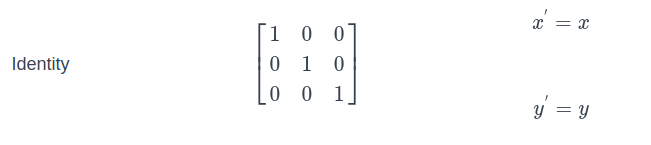

In [ ]:
rysujPunkty(A)


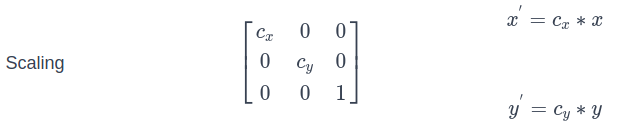

In [ ]:
# powiększenie dwukrotne
S = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])
rysujPunkty(A, S, True)

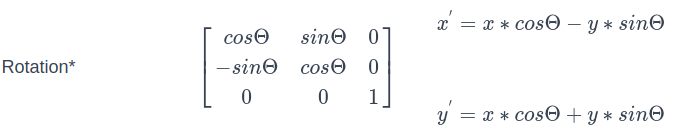

In [ ]:
# obrót o 45 stopni
R = np.array([[np.sqrt(2)/2, np.sqrt(2)/2, 0], [-np.sqrt(2)/2, np.sqrt(2)/2, 0], [0, 0, 1]])

# obrót o 45 stopni
rysujPunkty(A, R, True)

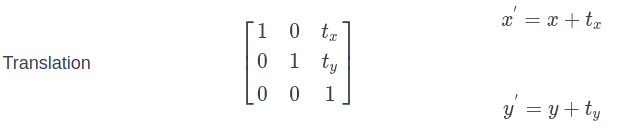

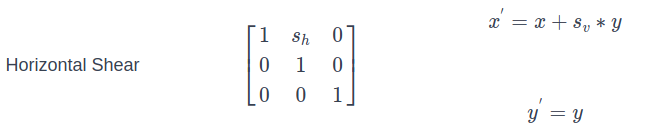

In [ ]:
# skoszenie o 0.5 w prawo
T = np.array([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])

# skoszenie o 0.5 w prawo
rysujPunkty(A, T, True)

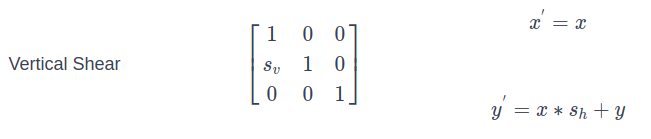

In [ ]:
# skoszenie o 0.5 w dół
T = np.array([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]])

# skoszenie o 0.5 w dół
rysujPunkty(A, T, True)

In [ ]:
# Składanie operacji
TT = R@S

# powiększenie oraz obrót
rysujPunkty(A, TT, True)

In [ ]:
# skalowanie
S = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]])

TT = np.float32(S.flatten()[:6].reshape(2,3))

img = cv2.imread('cameraman.tif')  

trans = cv2.warpAffine(img, TT, (512, 512))
fig, axes = plt.subplots(ncols=2, figsize=(35, 35))

print(img.shape)
print(trans.shape)

ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title('Obraz oryginalny')
ax[0].axis('off')

ax[1].imshow(trans)
ax[1].set_title('Obraz powiększony')
ax[1].axis('off')